<a href="https://colab.research.google.com/github/leehanchung/cs224w/blob/main/notebooks/XCS224W_Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS224W - Colab 1**

In this Colab, we will write the full pipeline for **learning node embeddings**.
We will go through the following 3 steps:



1.   To start, we will load the familiar [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) from Colab 0. We will explore multiple graph statistics over this graph.
2.   We will then work to transform the graph structure into a PyTorch tensor so that we can perform machine learning over the graph.

3. Finally, we will write our first graph learning algorithm: a node embedding model. For simplicity, our model is simpler than the DeepWalk and node2vec algorithms taught in Module 1, Unit 1.2 - Node Embeddings. Nevertheless, it will still be rewarding and challenging, as we will write the whole procedure from scratch via PyTorch.

Let's get started!

**Note**: Make sure to **sequentially run all the cells** so that the intermediate variables / packages will carry over to the next cell

# 1) Graph Basics
To start, we load the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a classical graph in network science. As discussed in the introduction, we begin by exploring multiple graph statistics for this graph.

## Setup
As introduced in Colab 0, NetworkX is a powerful package for storing and manipluating graphs. We will heavily rely on NetworkX throughout this Colab.

In [285]:
import networkx as nx
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a social network graph of 34 members of a karate club, where links exist between members who have interacted outside the club.

In [286]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

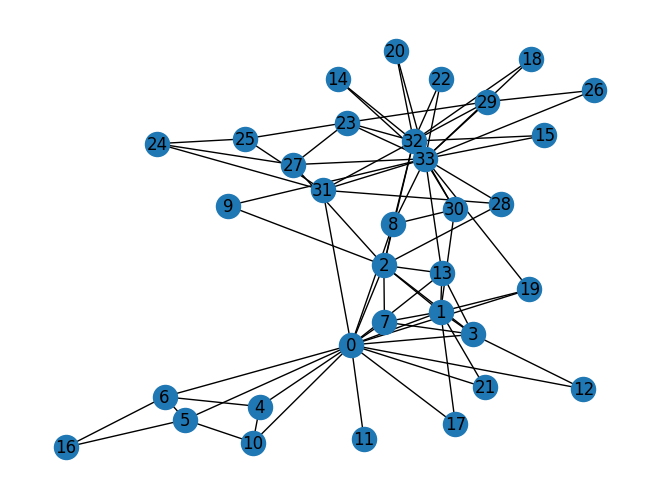

In [287]:
# Visualize the graph
if 'IS_GRADESCOPE_ENV' not in os.environ:
  nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [288]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [289]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [290]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement a function that takes the number of edges
  # and number of nodes of a graph, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4).

  avg_degree = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Do not import any other Python package
  ## 2: Do not use any function from NetworkX

  avg_degree = round(2 * num_edges / num_nodes)

  #########################################

  return avg_degree

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_edges = G.number_of_edges()
  num_nodes = G.number_of_nodes()
  avg_degree = average_degree(num_edges, num_nodes)
  print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [291]:
#@title
def average_clustering_coefficient(G):
  # TODO: Implement a function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  
  # https://networkx.org/documentation/stable/reference/algorithms/clustering.html
  avg_cluster_coef = round(nx.average_clustering(G), 2)

  #########################################

  return avg_cluster_coef

if 'IS_GRADESCOPE_ENV' not in os.environ:
  avg_cluster_coef = average_clustering_coefficient(G)
  print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j^{t+1} = \sum_{i \rightarrow j} \beta \frac{r_i^t}{d_i} + (1 - \beta) \frac{1}{N}$ to update the PageRank value of an arbitrary node j for the first time step $t = 0 \rightarrow t = 1$.

**NOTE:** $r_j^0 = 1 / |G|$ for all nodes j (where $|G|$ is the number of nodes in the graph). Namely, at $t=0$ every node is initialized with the same PageRank value.

In [292]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement a function that takes a nx.Graph, beta, r0 and node_id.
  # For the given node_id = j, compute rj_1 as the PageRank of the input
  # node j at time t = 1 (i.e. after ONE iteration). 
  # 
  # Round the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)
  #
  # NOTE: rj_0 = r0 for every node j (i.e. each node is initialized with 
  # the same PageRank value at t = 0; thus we do not need an initial PageRank
  # vector r).

  rj_1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank!

  for neighbor in G.neighbors(node_id):
    rj_1 += beta * r0 / G.degree[neighbor]
  rj_1 += (1 - beta) / G.number_of_nodes()
  rj_1 = round(rj_1, 2)
  
  #########################################

  return rj_1

if 'IS_GRADESCOPE_ENV' not in os.environ:
  beta = 0.8
  r0 = 1 / G.number_of_nodes()
  node = 0
  r0_1 = one_iter_pagerank(G, beta, r0, node)
  print("The PageRank value for node 0 after one iteration is {}".format(r0_1))

The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$. Remember that we want the raw (unnormalized) closeness centrality form Module 1, Unit 1.1 - Traditional Feature Based Methods.

In [293]:
def closeness_centrality(G, node=5):
  # TODO: Implement a function that calculates closeness centrality 
  # for a node in the karate club network. G is the input karate club 
  # network and 'node' is the node id of the node that we are interested
  # in. Please round the closeness centrality result to 2 decimal places.

  closeness = 0

  ############# Your code here ############
  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.

  normalized_closeness = nx.closeness_centrality(G, u=node)
  closeness = normalized_closeness / (len(nx.node_connected_component(G, node)) - 1)
  closeness = round(closeness, 2)
  
  #########################################

  return closeness

if 'IS_GRADESCOPE_ENV' not in os.environ:
  node = 5
  closeness = closeness_centrality(G, node=node)
  print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


# 2) Graph to Tensor
Now, we will work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [294]:
import torch
import tensorflow as tf
print(torch.__version__)

2.0.1+cpu


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [295]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

# in tensorflow above would be the ff:
ones = tf.ones(3, 4)
zeros = tf.zeros(3, 4)
random_tensor = tf.random.uniform(shape=(3, 4))
print(ones)
print(zeros)
print(random_tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2417, 0.9127, 0.7875, 0.6463],
        [0.1192, 0.1317, 0.9079, 0.4481],
        [0.0022, 0.4382, 0.3800, 0.5075]])
torch.Size([3, 4])
tf.Tensor([1 1 1], shape=(3,), dtype=uint8)
tf.Tensor([0 0 0], shape=(3,), dtype=uint8)
tf.Tensor(
[[0.19846833 0.41054237 0.06086481 0.9295131 ]
 [0.5409349  0.8822545  0.331591   0.2930143 ]
 [0.8532797  0.8861309  0.8629055  0.5408857 ]], shape=(3, 4), dtype=float32)


PyTorch tensors contains elements for a single data type, the `dtype`.

In [296]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of the `pos_edge_index` tensor? (5 Points)

In [297]:
def graph_to_edge_list(G):
  # TODO: Implement a function that returns the edge list of
  # a nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple represents an edge between two nodes.

  edge_list = []

  ############# Your code here ############
  ## Note:
  ## Try to use simple networkx functions.
  edge_list = list(list(G.edges()))
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement a function that transforms the edge_list to a
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].
  print(edge_list)

  edge_index = torch.tensor([])

  ############# Your code here ############
  torch_edge_index = torch.tensor(edge_list).T
  tf_edge_index = tf.transpose(tf.Variable(edge_list))
  print(f'pytorch {torch_edge_index}')
  print(f'tensorflow: {tf_edge_index}')

  #########################################

  return torch_edge_index, tf_edge_index

if 'IS_GRADESCOPE_ENV' not in os.environ:
  pos_edge_list = graph_to_edge_list(G)
  torch_pos_edge_index, tf_pos_edge_index = edge_list_to_tensor(pos_edge_list)
  print("The pos_edge_index tensor has shape {}".format(torch_pos_edge_index.shape))
  print("The pos_edge_index tensor has sum value {} \n\n".format(torch.sum(torch_pos_edge_index)))

  print("The pos_edge_index tensor has shape {}".format(tf_pos_edge_index.shape))
  print("The pos_edge_index tensor has sum value {}".format(tf.reduce_sum(tf_pos_edge_index)))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
pytorch tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23

## Side notes:
The above edge sets are actually all the connections in the karate club network/graph. Where the first tensor are the list of head nodes and the second tensor are the list of tail nodes.

## Question 6: Implement a function that samples negative edges. Here we define a negative edge between nodes $u$ and $v$ if there is no edge between $u$ and $v$ in the graph.

## Then, write a short function to answer which edges (edge_1 to edge_5) can be negative edges in the karate club network? (10 Points)

In [298]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement a function that returns a list of RANDOM negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. 
  # 
  # In this implementation, self loops should not be considered as
  # either positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph; if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one? No (1, 0) cannot be a negative
  # edges if and only if a graph is undirected

  # Set the random number generator seed
  random.seed(1)

  neg_edge_list = []

  ############# Your code here ############
  ## NOTE:
  ## Remeber to sample negative edges randomly!
  pos_edge_list = graph_to_edge_list(G)

  for node_i in G.nodes():
    for node_j in G.nodes():
      # we traverse through all the possible edge combinations and see if it occurs as an edge in our graph
      # because if it is not in graph OR in our positive (existing edges) edge list then it can be added in our
      # negative (non existent edges) edge list.
      if check_negative_edge(G, (node_i, node_j)):
        neg_edge_list.append((node_i, node_j))

  neg_edge_list = random.sample(neg_edge_list, num_neg_samples)
  #########################################

  return neg_edge_list

def check_negative_edge(G, edge):
  # TODO: Implement a function that returns whether a given edge 
  # is a negative edge within the graph G.

  is_negative_edge = False

  ############# Your code here ############
  ## NOTE:
  ## Check the definition of a negative edge from the question.
  pos_edge_list = graph_to_edge_list(G)

  is_negative_edge = (edge not in pos_edge_list) and \
                     ((edge[1], edge[0]) not in pos_edge_list)
  #########################################

  return is_negative_edge

if 'IS_GRADESCOPE_ENV' not in os.environ:
  # We can sample 78 negative edges as opposed to our also 78 positive or existent edges
  neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

  # Transform the negative edge list to tensor
  torch_neg_edge_index, tf_neg_edge_index = edge_list_to_tensor(neg_edge_list)
  print("The neg_edge_index tensor has shape {}".format(torch_neg_edge_index.shape))
  print("The neg_edge_index tensor has shape {}".format(tf_neg_edge_index.shape))

  # Which of following edges can be negative ones?
  edge_1 = (7, 1)
  edge_2 = (1, 33)
  edge_3 = (33, 22)
  edge_4 = (0, 4)
  edge_5 = (4, 2)

  for u, v in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    print ((u, v), check_negative_edge(G, (u, v)))


[(5, 14), (19, 22), (28, 26), (27, 10), (26, 2), (2, 30), (9, 17), (4, 28), (17, 11), (25, 33), (15, 26), (16, 19), (22, 10), (13, 19), (26, 27), (7, 32), (4, 2), (17, 3), (1, 16), (30, 13), (28, 14), (13, 30), (15, 9), (20, 29), (26, 0), (26, 5), (0, 14), (23, 23), (15, 22), (9, 28), (24, 20), (8, 20), (20, 12), (32, 7), (4, 12), (30, 22), (11, 18), (1, 20), (1, 8), (1, 12), (22, 8), (18, 24), (0, 24), (32, 0), (29, 31), (13, 21), (23, 13), (8, 7), (33, 11), (14, 30), (24, 26), (18, 10), (8, 13), (15, 14), (19, 6), (8, 24), (12, 14), (8, 22), (23, 4), (8, 10), (16, 4), (32, 19), (10, 22), (31, 16), (14, 24), (28, 16), (31, 6), (19, 9), (31, 12), (22, 0), (4, 9), (7, 8), (21, 21), (24, 23), (29, 7), (10, 29), (4, 31), (25, 11)]
pytorch tensor([[ 5, 19, 28, 27, 26,  2,  9,  4, 17, 25, 15, 16, 22, 13, 26,  7,  4, 17,
          1, 30, 28, 13, 15, 20, 26, 26,  0, 23, 15,  9, 24,  8, 20, 32,  4, 30,
         11,  1,  1,  1, 22, 18,  0, 32, 29, 13, 23,  8, 33, 14, 24, 18,  8, 15,
         19

# Side notes:
* Here because in our edge list $(1, 7)$ occurs $(7, 1)$ is still a part of our positive edge list since our graph is undirected, same with edges $(33, 22)$ and $(0, 4)$
* $(1, 33)$ or even $(33, 1)$ is an edge that does not occur in our positive edge list so it is true that it is a negative edge

# 3) Node Emebedding Learning

Finally, we complete our first learning algorithm on graphs: a node embedding model.


## Setup

In [299]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

print(torch.__version__)

2.0.1+cpu


To write our own node embedding model, we heavily utilize the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let us first explore how to use `nn.Embedding`:

In [300]:
# Initialize an embedding layer.
# Suppose we want to have embedding for 4 items (e.g., nodes).
# Each item is represented by an 8 dimensional vector.

torch_emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(torch_emb_sample))

Sample embedding layer: Embedding(4, 8)


In [301]:
# in tensorflow this is 
num_unique = 4
emb_dim = 8
tf_emb_sample = tf.keras.layers.Embedding(input_dim=num_unique, output_dim=emb_dim)
print('Sample embedding layer: {}'.format(tf_emb_sample))

Sample embedding layer: <keras.src.layers.core.embedding.Embedding object at 0x0000024A5D627B50>


We can select items from the embedding matrix by using Tensor indices.

In [302]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(torch_emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(torch_emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = torch_emb_sample.weight.data.shape
print(shape)
# Overwrite the weight to tensor with all ones
torch_emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(torch_emb_sample(ids))

tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4339e-02]], grad_fn=<EmbeddingBackward0>)
tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4339e-02],
        [ 4.5921e-01,  8.7926e-02,  9.4428e-01, -7.5985e-01,  1.6396e+00,
         -1.9154e+00, -1.8657e+00, -6.7076e-01]], grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [303]:
id = tf.Variable([1])
print(tf_emb_sample(id))

# converts the initial ids of 2 x 1 by looking up the embedding matrix 
# and then outputting these respective ids embeddings which in practice would have
# dimensionality m x 1 x 8, m being number of examples, 1 being a scalar value or 
# in this case id, and 8 being its embedding dimensions
ids = tf.Variable([1, 2])
print(tf_emb_sample(ids))

tf_emb = tf_emb_sample.get_weights()
print(tf_emb)

tf.Tensor(
[[ 0.02975091 -0.02708507  0.02858059  0.04394554 -0.01637894  0.0074679
   0.00696666 -0.04303551]], shape=(1, 8), dtype=float32)
tf.Tensor(
[[ 0.02975091 -0.02708507  0.02858059  0.04394554 -0.01637894  0.0074679
   0.00696666 -0.04303551]
 [ 0.01912357  0.02150709  0.03100536  0.00724177  0.01973447  0.04414454
  -0.02887596  0.0425531 ]], shape=(2, 8), dtype=float32)
[array([[ 0.03105798, -0.02780297,  0.04010424, -0.03207437,  0.03912488,
         0.01568529,  0.01697016,  0.01928509],
       [ 0.02975091, -0.02708507,  0.02858059,  0.04394554, -0.01637894,
         0.0074679 ,  0.00696666, -0.04303551],
       [ 0.01912357,  0.02150709,  0.03100536,  0.00724177,  0.01973447,
         0.04414454, -0.02887596,  0.0425531 ],
       [ 0.00793578, -0.01996604, -0.01505347, -0.03575025,  0.00602161,
         0.04648617, -0.02454093,  0.02370335]], dtype=float32)]


Now, it's your time to create a node embedding matrix for our graph!
- We want to have **16 dimensional** vectors for each node in the karate club network.
- We initalize the matrix using a **uniform distribution**, in the range of $[0, 1)$. We suggest using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [304]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def tf_create_node_emb(num_nodes=34, embedding_dim=16):

  tf_emb_layer = tf.keras.layers.Embedding(input_dim=num_nodes, output_dim=embedding_dim)

  # we want to initialize our embedding matrix coefficients to a uniform distribution
  # between the [0, 1) interval excluding 1
  tf_init_emb_matrix = tf.random.uniform(shape=(num_nodes, embedding_dim))
  tf_emb_layer.build(input_shape=(None,))
  tf_emb_layer.set_weights(weights=[tf_init_emb_matrix])

  return tf_emb_layer

def create_node_emb(num_nodes=34, embedding_dim=16):
  # TODO: Implement a function that creates the node embedding matrix.
  # Return a torch.nn.Embedding layer. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of the returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_nodes, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand(num_nodes, embedding_dim)
  #########################################

  

  return emb

if 'IS_GRADESCOPE_ENV' not in os.environ:
  emb = create_node_emb()
  ids = torch.LongTensor([0, 3])
  
  # Print the embedding layer
  print("Embedding: {}".format(emb))

  # An example that gets the embeddings for node 0 and 3
  print(emb(ids))


  tf_emb_layer = tf_create_node_emb()
  
  # say our nodes unique id's are 0 and 3 and we want to look up these id's
  # embeddings or their respective vector representations
  tf_ids = tf.Variable([0, 3])

  # tf_emb_layer.get_weights() returns a list, where the 0th index
  # contains the main embedding matrix and the 1st index is contains
  # the embedding bias vector should any bias vector be provided when
  # the self.set_weights() method of a layer is used
  print("tf Embedding: {}".format(tf_emb_layer.get_weights()[0].shape))
  print(tf_emb_layer(tf_ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)
tf Embedding: (34, 16)
tf.Tensor(
[[0.37626445 0.6818563  0.7383784  0.7023777  0.80464935 0.84435034
  0.73941255 0.68705845 0.7422756  0.32048464 0.49634385 0.7526506
  0.45684934 0.64478445 0.17978144 0.5822265 ]
 [0.5811056  0.43581736 0.61972296 0.08988881 0.9307983  0.94430625
  0.09378839 0.88626623 0.79190826 0.5592927  0.3878286  0.8509016
  0.91241884 0.40895903 0.82701445 0.7951256 ]], shape=(2, 16), dtype=float32)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then, we visualize each point, colored by the community it belongs to.

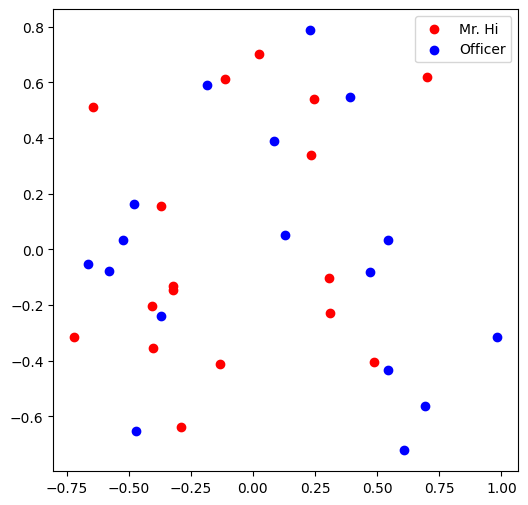

In [305]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
if 'IS_GRADESCOPE_ENV' not in os.environ:
  visualize_emb(emb)

## Question 7: Training your embeddings! Train your embedding model and see the best performance that you can get. You should experiment with changing a few of the hyper parameters to observe the effect on training. (10 Points)

**NOTE**: There is no need to heavily hyper-parameter tune your model! We ask you to explore updateding a couple of hyper-parameters primarily to explore their potential effects. 


In [306]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes as input the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted values greater than 0.5 are 
  # classified as label 1. Else they are classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0
  ############# Your code here ############
  accu = torch.sum(torch.round(pred) == label) / pred.shape[0]
  accu = round(accu.item(), 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()
    # (1) Get the embeddings of the nodes in train_edge
    node_emb = emb(train_edge)
    
    # (2) Dot product the embeddings between each node pair
    dot_prod = torch.sum(node_emb[0] * node_emb[1], dim=-1)
    
    # (3) Feed the dot product result into sigmoid
    pred = sigmoid(dot_prod)

    # (4) Feed the sigmoid output into the loss_fn
    loss = loss_fn(pred, train_label)

    loss.backward()
    optimizer.step()

    # (5) Print both loss and accuracy of each epoch 
    print(f"Epoch: {i} Loss: {loss:.4f}, "
          f"Accuracy: {accuracy(pred, train_label)}\n")
    #########################################

if 'IS_GRADESCOPE_ENV' not in os.environ:
  loss_fn = nn.BCELoss()
  sigmoid = nn.Sigmoid()

  # Generate the positive and negative labels
  pos_label = torch.ones(torch_pos_edge_index.shape[1], )
  neg_label = torch.zeros(torch_neg_edge_index.shape[1], )

  # Concat positive and negative labels into one tensor
  train_label = torch.cat([pos_label, neg_label], dim=0)

  # Concat positive and negative edges into one tensor
  # Since the network is very small, we do not split the edges into val/test sets
  train_edge = torch.cat([torch_pos_edge_index, torch_neg_edge_index], dim=1)
  print(train_edge)

  train(emb, loss_fn, sigmoid, train_label, train_edge)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32,  5, 19, 28, 27, 26,  2,  9,  4, 17, 25, 15, 16,
         22, 13, 26,  7,  4, 17,  1, 30, 28, 13, 15, 20, 26, 26,  0, 23, 15,  9,
         24,  8, 20, 32,  4, 30, 11,  1,  1,  1, 22, 18,  0, 32, 29, 13, 23,  8,
         33, 14, 24, 18,  8, 15, 19,  8, 12,  8, 23,  8, 16, 32, 10, 31, 14, 28,
         31, 19, 31, 22,  4,  7, 21, 24, 29, 10,  4, 25],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31

# Tensorflow implementation of above binary classification side task to learn node embeddings
* instantiate karate club network
* we want to convert the graphs nodes to a list particularly a list of tuples which represent the graphs edges using graph_to_list()
* we want to convert this edge list to tensors separating the nodes from each other using edge_list_to_tensor()
* 
* so using the function tf_create_node_emb() we created, and the edge_to

In [307]:
my_graph_G = nx.karate_club_graph()
num_unique_nodes = my_graph_G.number_of_nodes()
print(f"number of unique nodes in graph: {num_unique_nodes}")

# a positive edge list simply contains all the edges that exist in our graph so node A connects to node B
# and our graph is undirected then node edge (B, A) is also a positive edge, but if C does not even connect
# a certain node let's say node D, then edge (C, D) and (D, C) are negative edges
my_pos_edge_list = graph_to_edge_list(my_graph_G)

# we need this to sample negative edges 
_, tf_pos_edges_tensors = edge_list_to_tensor(my_pos_edge_list)

# sample negative edges or non-existent edges. In previous examples we had the number of negative edges
# be equal to the number of positive edges but in practice the ratio of positive to negative edges would be
# 1 to 5 meaning for every positive edge we would sample 5 negative edges. So if our number of edges is 78
# we would sample 78 * 5 negative edges which is 390
my_neg_edge_list = sample_negative_edges(my_graph_G, len(my_pos_edge_list) * 5)

# turn neg_edge_list to tensors
_, tf_neg_edges_tensors = edge_list_to_tensor(my_neg_edge_list)

print(f"positive edges shape: {tf_pos_edges_tensors.shape}")
print(f"negative edges shape: {tf_neg_edges_tensors.shape}")

# labels of positive edges
labels_of_pos = tf.ones(shape=(tf_pos_edges_tensors.shape[1], 1))
labels_of_neg = tf.zeros(shape=(tf_neg_edges_tensors.shape[1], 1))

X = tf.concat([tf_pos_edges_tensors, tf_neg_edges_tensors], axis=1).numpy()
Y = tf.concat([labels_of_pos, labels_of_neg], axis=0).numpy()
print(f"X: {X}")
print(f"Y: {Y}")

shuffled_X, shuffled_Y = shuffle(X.T, Y, random_state=0)

number of unique nodes in graph: 34
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
pytorch tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19,

In [308]:
class MyNode2Vec(tf.keras.Model):
    def __init__(self, num_unique_nodes, emb_dim=16, lambda_=1):
        super(MyNode2Vec, self).__init__()
        self.node_emb_layer = tf.keras.layers.Embedding(
            num_unique_nodes, 
            emb_dim, 
            embeddings_initializer='glorot_uniform', 
            embeddings_regularizer=tf.keras.regularizers.L2(lambda_)
        )

        self.dot_layer = tf.keras.layers.Dot(axes=(2, 1))
        self.flatten_layer = tf.keras.layers.Flatten()
        self.act_layer = tf.keras.layers.Activation(activation=tf.nn.sigmoid)

    def call(self, inputs):
        node_a, node_b = inputs
        print(node_a, node_b)

        # m x 1 dimensionality of both node a and node b inputs becomes m x 1 x 16
        node_a_emb = self.node_emb_layer(node_a)
        node_b_emb = self.node_emb_layer(node_b)

        # m x 1 x 16 node a emb will be multiplied to m x 16 x 1 transpose of node b emb
        dot = self.dot_layer([node_a_emb, tf.transpose(node_b_emb, perm=[0, 2, 1])])
        flat_dot = self.flatten_layer(dot)
        prob = self.act_layer(flat_dot)

        return prob

In [309]:
# final dataset for training will be the ff:
print(shuffled_X)
print(shuffled_Y)

[[21  6]
 [27  5]
 [12 14]
 [22 10]
 [ 6 23]
 [ 1 19]
 [ 9 28]
 [32 11]
 [13  4]
 [18  3]
 [ 3 17]
 [18  6]
 [12 12]
 [22  7]
 [ 6 29]
 [ 3 25]
 [ 0 33]
 [19 29]
 [ 0 17]
 [ 7 16]
 [24 21]
 [31  5]
 [ 9 20]
 [19 17]
 [22  8]
 [ 7  7]
 [23  1]
 [11 22]
 [ 0 12]
 [ 0 31]
 [14 12]
 [33 10]
 [16 16]
 [14 29]
 [ 0  2]
 [17 12]
 [ 1 16]
 [27 12]
 [22 24]
 [ 1  6]
 [12  9]
 [ 8 23]
 [17 16]
 [ 9 30]
 [28 15]
 [15 27]
 [ 8  4]
 [17 32]
 [20 33]
 [ 5  6]
 [26 24]
 [16  7]
 [ 9 31]
 [10 27]
 [ 1 10]
 [ 5 14]
 [31 33]
 [ 3 27]
 [ 6 10]
 [ 6 21]
 [21 23]
 [19  7]
 [26 30]
 [22 33]
 [ 3 32]
 [23 32]
 [ 0  7]
 [29 32]
 [ 8  7]
 [ 8 24]
 [31 32]
 [ 8 26]
 [31  2]
 [ 6  7]
 [26 19]
 [ 7 22]
 [30  9]
 [11 33]
 [26  0]
 [32  0]
 [24  1]
 [ 4 31]
 [26  3]
 [23 29]
 [ 6  9]
 [27 17]
 [24  0]
 [25 31]
 [10 14]
 [32 10]
 [ 8 14]
 [22 32]
 [ 9 11]
 [28 16]
 [17 21]
 [15 29]
 [15  9]
 [ 2  4]
 [27 22]
 [10 22]
 [ 7 12]
 [27 21]
 [15 33]
 [19 33]
 [30 33]
 [ 2  8]
 [13 33]
 [14  1]
 [ 1 28]
 [ 0  5]
 [22 15]
 

In [313]:
import pandas as pd
df = pd.DataFrame(shuffled_X, columns=['node_a', 'node_b'])

# train model
node2vec = MyNode2Vec(num_unique_nodes=my_graph_G.number_of_nodes())
node2vec.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()]
)

node2vec.fit(
    [df['node_a'], df['node_b']], shuffled_Y,
    epochs=100,
    validation_split=0.3
)

Epoch 1/100
Tensor("IteratorGetNext:0", shape=(None, 1), dtype=int32) Tensor("IteratorGetNext:1", shape=(None, 1), dtype=int32)
Tensor("IteratorGetNext:0", shape=(None, 1), dtype=int32) Tensor("IteratorGetNext:1", shape=(None, 1), dtype=int32)
11/11 [==============================] - 4s 36ms/step - loss: 20.6832 - binary_accuracy: 0.4862 - precision_8: 0.1437 - recall_8: 0.4259 - f1_score: 0.2835 - val_loss: 17.4328 - val_binary_accuracy: 0.5106 - val_precision_8: 0.1918 - val_recall_8: 0.5833 - val_f1_score: 0.2909
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 15.4110 - binary_accuracy: 0.4893 - precision_8: 0.1447 - recall_8: 0.4259 - f1_score: 0.2835 - val_loss: 12.8579 - val_binary_accuracy: 0.5106 - val_precision_8: 0.1918 - val_recall_8: 0.5833 - val_f1_score: 0.2909
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 11.3090 - binary_accuracy: 0.4771 - precision_8: 0.1411 - recall_8: 0.4259 - f1_score: 0.2835 - val_loss: 9.3738 - v

## **Saving Your Model Predictions**!
After you have successfully trained your embedding model, run the cell below to save your model's predictions over the training data. The function below will generate and save a csv file called *model_predictions.csv* to the local colab files folder. This folder can be accessed by clicking the *Folder* icon on the left panel underneath the *Table of contents*, *Find and replace*, and *Code snippets* icons. 

When submitting this colab you will have to download your model's predictions and submit them along with your colab ipython notebook.

In [311]:
import pandas as pd
import numpy as np

def save_model_results(emb_model, train_label, train_edge):
  """
    Helper function to save the model predictions and data
    labels to a csv file for submission.
  """
  sigmoid = nn.Sigmoid()

  # Generate model predictions
  embedding_u = emb_model(train_edge[0])
  embedding_v = emb_model(train_edge[1])
  product = embedding_u * embedding_v

  pred = torch.sum(product, dim=1)
  pred = sigmoid(pred).detach()

  # Create a pandas datafram with columns
  # model_pred | binary_pred | label
  data = {}
  data['model_pred'] = pred
  data['binary_pred'] = np.where(pred > 0.5, 1.0, 0.0)
  data['label'] = train_label.detach()

  df = pd.DataFrame(data=data)
  # Save to csv
  df.to_csv('model_predictions.csv', sep=',', index=False)

if 'IS_GRADESCOPE_ENV' not in os.environ:
  save_model_results(emb, train_label, train_edge)

## Visualize the final node embeddings
Now we can visually compare our embeddings with the embeddings before training. After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanity check for your implementation, in addition to tracking the model's accuracy.

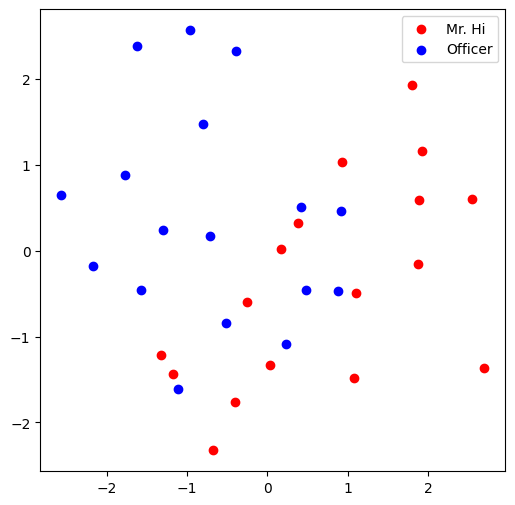

In [312]:
# Visualize the final learned embedding
if 'IS_GRADESCOPE_ENV' not in os.environ:
  visualize_emb(emb)

# Submission

You will need to submit two files on Gradescope to complete this notebook. 

1.   Your completed *XCS224W_Colab1.ipynb*. From the "File" menu select "Download .ipynb" to save a local copy of your completed Colab. 
2.   Your model predictions. Open up the local Colab file folder (by selecting the Folder icon on the left panel) and download *model_predictions.csv* 

For submitting your work, zip the files downloaded in steps 1 and 2 above and submit to gradescope. **NOTE:** DO NOT rename any of the downloaded files. The file names should be *XCS224W_Colab1.ipynb* and *model_predictions.csv*.

